<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [5]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [6]:
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl') 

In [7]:
#Importation de la librairie Pandas
import pandas as pd

In [8]:
#Importation de la librairie plotly express
import plotly.express as px

In [9]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [10]:
df_web = pd.read_excel(r"D:\data_docs\OPC\P6\prepa\Data\web.xlsx")
df_erp = pd.read_excel(r"D:\data_docs\OPC\P6\prepa\Data\erp.xlsx")
df_liaison = pd.read_excel(r"D:\data_docs\OPC\P6\prepa\Data\liaison.xlsx")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [12]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [13]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [14]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons = df_erp.duplicated(subset=['product_id']).sum()
print('nous avons', doublons ,'doublons dans la colonne product_id')
del doublons

nous avons 0 doublons dans la colonne product_id


In [15]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
unique = list(df_erp['stock_status'].unique())
print(f"les valeurs distinctes de la colonne stock_status sont", unique)
print("les valeurs distinctes de la colonne stock_status sont liées à la colonne stock_quantity")

les valeurs distinctes de la colonne stock_status sont ['instock', 'outofstock']
les valeurs distinctes de la colonne stock_status sont liées à la qtt


In [16]:
df_erp[df_erp['stock_status']=='outofstock']

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
2,3850,1,20.8,0,outofstock,10.64
4,4039,1,46.0,3,outofstock,23.77
8,4043,1,60.0,0,outofstock,29.45
11,4047,1,18.3,0,outofstock,9.93
15,4051,1,7.7,0,outofstock,4.14
...,...,...,...,...,...,...
723,6301,1,40.5,0,outofstock,20.51
726,6327,0,28.5,0,outofstock,14.43
752,6632,1,52.7,0,outofstock,26.41
774,6900,0,30.0,0,outofstock,16.28


In [17]:
# Créer une table croisée avec des fonctions d'agrégation
pivot_table = df_erp.pivot_table(index='stock_status', values='stock_quantity', aggfunc=['sum', 'mean', 'count'])

# Afficher la table croisée pour voir les relations
print("Table croisée stock_status vs stock_quantity (pour voir les relations):")
print(pivot_table)
del pivot_table

Table croisée stock_status vs stock_quantity (pour voir les relations):
                        sum           mean          count
             stock_quantity stock_quantity stock_quantity
stock_status                                             
instock               17819      24.309686            733
outofstock               -8      -0.086957             92


In [18]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2']=np.where(df_erp['stock_quantity'] <= 0  , 'outofstock', 'instock')

In [19]:
df_erp.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price
count,825.000000,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.867879,32.187697,21.589091,16.940582
std,902.644635,0.338828,26.712077,21.933807,14.561840
min,3847.000000,0.000000,-20.000000,-10.000000,2.740000
25%,4348.000000,1.000000,14.500000,7.000000,7.590000
50%,4907.000000,1.000000,24.300000,18.000000,12.710000
75%,5805.000000,1.000000,42.000000,30.000000,22.020000
max,7338.000000,1.000000,225.000000,145.000000,137.810000


In [20]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [21]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [22]:
#Il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
comparaison = df_erp["stock_status"] == df_erp["stock_status_2"]
comparaison_sum = comparaison.sum()
print ('nous avons',comparaison_sum,'lignes identiques')


nous avons 823 lignes identiques


In [23]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   stock_status_2  825 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 45.2+ KB


In [24]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
different_rows = df_erp[~comparaison]
different_rows

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [25]:
df_erp['stock_status']=df_erp['stock_status_2']

In [26]:
different_rows = df_erp[~comparaison]
different_rows

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,instock,23.77,instock
398,4885,1,18.7,0,outofstock,9.66,outofstock


In [27]:
#Corriger la ou les données incohérentes
df_erp['stock_status']=df_erp['stock_status_2']
#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp['stock_status_2']=np.where(df_erp['stock_quantity'] == 0 , 'outofstock', 'instock')
comparaison = df_erp["stock_status"] == df_erp["stock_status_2"]
comparaison_sum = comparaison.sum()
print ('nous avons',comparaison_sum,'lignes identiques')

nous avons 823 lignes identiques


Est c'est le resultat recherche 

In [28]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,instock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [29]:
df_erp[df_erp.isnull().any(axis=1)]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [30]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
prix_null_erp = df_erp['price'].isnull().sum()

#Afficher le ou les prix non renseignés dans la colonne "price"
print(f"Nombres d'article avec un prix non renseignés: {prix_null_erp}".format()) 
#Afficher le prix minimum de la colonne "price"
prix_min_erp = df_erp['price'].min()
print("le prix minimum de la colonne 'price'",prix_min_erp)
#Afficher le prix maximum de la colonne "price"
prix_max_erp = df_erp['price'].max()
print("le prix maximum de la colonne 'price'",prix_max_erp)
#Affichier les prix inférieurs à 0 
prix_neg_erp = df_erp['price'].le(0).sum()
print("Nombre de prix inférieurs à 0 de la colonne 'price'",prix_neg_erp)

Nombres d'article avec un prix non renseignés: 0
le prix minimum de la colonne 'price' -20.0
le prix maximum de la colonne 'price' 225.0
les prix inférieurs à 0 de la colonne 'price' 3


In [31]:
#On regarde en detail les lignes avec un prix inférieurs à 0 ;
erp_neg_prix = (df_erp['price'] < 0)
erp_neg_prix
#On drop les prix negatif (Demande du client)
df_erp = df_erp[~erp_neg_prix]

# Afficher le DataFrame avec les prix remplacés
print("DataFrame avec les prix non renseignés ou négatifs remplacés:")
print(df_erp)

DataFrame avec les prix non renseignés ou négatifs remplacés:
     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price stock_status_2  
0             12.88        instock  
1             17.54        instock  
2             10.64   

In [32]:
erp_neg_prix = (df_erp['price'] < 0)
df_erp[erp_neg_prix]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


In [33]:
prix_min_erp = df_erp['price'].min()
print("le prix minimum de la colonne 'price'",prix_min_erp)

le prix minimum de la colonne 'price' 5.2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [34]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
qtt_min_erp = df_erp['stock_quantity'].min()
print("la quantité minimum de la colonne 'stock_quantity'",qtt_min_erp)
#Afficher la quantité maximum de la colonne "stock_quantity"
qtt_max_erp = df_erp['stock_quantity'].max()
print("la quantité maximum de la colonne 'stock_quantity'",qtt_max_erp)
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
erp_neg_qtt = (df_erp['stock_quantity'] < 0).sum()
print("nombre de stocks inférieurs à 0 de la colonne 'stock_quantity'",erp_neg_qtt)

la quantité minimum de la colonne 'stock_quantity' -10
la quantité maximum de la colonne 'stock_quantity' 145
les stocks inférieurs à 0 de la colonne 'stock_quantity' 2


In [35]:
#les stocks inférieurs à 0 de la colonne 'stock_quantity' 92 ; faudra tout passer a 0
# Remplacer les stocks inférieurs ou égaux à 0 par 0
df_erp['stock_quantity'] = df_erp['stock_quantity'].mask(df_erp['stock_quantity'].le(0), 0)

# Afficher le DataFrame avec les stocks modifiés
print("DataFrame avec les stocks inférieurs ou égaux à 0 remplacés par 0 :")
print(df_erp)

DataFrame avec les stocks inférieurs ou égaux à 0 remplacés par 0 :
     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price stock_status_2  
0             12.88        instock  
1             17.54        instock  
2             10

C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_21176\154482003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp['stock_quantity'] = df_erp['stock_quantity'].mask(df_erp['stock_quantity'].le(0), 0)


In [36]:
erp_neg_qtt = (df_erp['stock_quantity'] < 0).sum()
print("la somme des stocks inférieurs à 0 de la colonne 'stock_quantity' est égale à",erp_neg_qtt,"parfait, cela veut dire que nous pouvons passer a la suite")

la somme des stocks inférieurs à 0 de la colonne 'stock_quantity' est égale à 0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [37]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print(df_erp['onsale_web'])
#
print("c est une valeur boolean, pour dire si l article est en ligne ou pas")

0      1
1      1
2      1
3      1
4      1
      ..
820    0
821    0
822    1
823    0
824    1
Name: onsale_web, Length: 822, dtype: int64
c est une valeur boolean, pour dire si l article est en ligne ou pas


In [38]:
#Quelles sont les colonnes à conserver selon vous?
#toutes 

In [39]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp.drop(columns=['stock_status_2'], inplace=True)

C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_21176\1048807866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp.drop(columns=['stock_status_2'], inplace=True)


In [40]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [41]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
pprice_null_erp = df_erp[df_erp['purchase_price'].isnull()]
print('le ou les prix non renseignés dans la colonne "purchase_price"',pprice_null_erp)
#Afficher le prix minimum de la colonne "purchase_price"
pprice_min_erp = df_erp['purchase_price'].min()
print("le prix minimum de la colonne 'purchase_price'",pprice_min_erp)
#Afficher le prix maximum de la colonne "purchase_price"
pprice_max_erp = df_erp['purchase_price'].max()
print("le prix maximum de la colonne 'purchase_price'",pprice_max_erp)

le ou les prix non renseignés dans la colonne "purchase_price" Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []
le prix minimum de la colonne 'purchase_price' 2.74
le prix maximum de la colonne 'purchase_price' 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [42]:
df_web = pd.read_excel(r"D:\data_docs\OPC\P6\prepa\Data\web.xlsx")

In [43]:
df_web.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,...,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-04-17 15:29:17,...,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,...,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16295,0,0,0,0.0,14.0,NaN,NaN,2.0,2018-02-15 14:05:06,...,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15328,0,0,0,0.0,2.0,taxable,NaN,2.0,2019-03-27 18:05:09,...,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [44]:
#Dimension du dataset
df_web.shape
#Nombre d'observations

#Nombre de caractéristiques


(1513, 29)

In [45]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print(df_web.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [46]:
list(df_web.columns)

['sku',
 'virtual',
 'downloadable',
 'rating_count',
 'average_rating',
 'total_sales',
 'tax_status',
 'tax_class',
 'post_author',
 'post_date',
 'post_date_gmt',
 'post_content',
 'product_type',
 'post_title',
 'post_excerpt',
 'post_status',
 'comment_status',
 'ping_status',
 'post_password',
 'post_name',
 'post_modified',
 'post_modified_gmt',
 'post_content_filtered',
 'post_parent',
 'guid',
 'menu_order',
 'post_type',
 'post_mime_type',
 'comment_count']

In [47]:
#Selon vous, quelles sont les colonnes à conserver ?
liste_web = ['sku',
 'total_sales',
 'tax_status',
 'product_type',
 'post_title',
 'post_type',
 'post_mime_type',
 ]
print(f"les colonnes a conserver sont : ", liste_web)

les colonnes a conserver sont :  ['sku', 'total_sales', 'tax_status', 'product_type', 'post_title', 'post_type', 'post_mime_type']


In [48]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web = df_web.loc[:, df_web.columns.isin(liste_web)]
print(df_web)

        sku  total_sales tax_status product_type  \
0     11862          3.0        NaN          Vin   
1     16057          5.0        NaN          Vin   
2     14692          5.0    taxable          Vin   
3     16295         14.0        NaN          Vin   
4     15328          2.0    taxable          Vin   
...     ...          ...        ...          ...   
1508  16326          5.0    taxable          Vin   
1509  15662         15.0    taxable          Vin   
1510  15329          3.0        NaN          Vin   
1511  14827          7.0        NaN          Vin   
1512  16004          5.0        NaN          Vin   

                                             post_title   post_type  \
0                     Gilles Robin Hermitage Rouge 2012  attachment   
1     Domaine Pellé Sancerre Rouge La Croix Au Garde...  attachment   
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016     product   
3     Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...  attachment   
4                  A

In [49]:
#verification :
df_web

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
0,11862,3.0,NaN,Vin,Gilles Robin Hermitage Rouge 2012,attachment,image/jpeg
1,16057,5.0,NaN,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,attachment,image/jpeg
2,14692,5.0,taxable,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,product,NaN
3,16295,14.0,NaN,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,attachment,image/jpeg
4,15328,2.0,taxable,Vin,Agnès Levet Côte Rôtie Maestria 2017,product,NaN
...,...,...,...,...,...,...,...
1508,16326,5.0,taxable,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,product,NaN
1509,15662,15.0,taxable,Vin,Chermette Domaine du Vissoux Beaujolais Griott...,product,NaN
1510,15329,3.0,NaN,Vin,Agnès Levet Côte Rôtie Péroline 2017,attachment,image/jpeg
1511,14827,7.0,NaN,Vin,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,attachment,image/jpeg


In [50]:
df_web.loc[:,'sku'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1513 entries, 0 to 1512
Series name: sku
Non-Null Count  Dtype 
--------------  ----- 
1428 non-null   object
dtypes: object(1)
memory usage: 11.9+ KB


In [51]:
df_web['sku'].unique()

array([11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572,
       16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425,
       16560, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475,
       13754, 14680, 15875, 9636, 13849, 13662, 16564, 13557, 15429,
       14712, 15032, 15481, 15448, 16580, 15441, 804, 15300, 13958, 16071,
       15678, 13895, 15711, 12882, 16053, 13766, 16247, 12640, 15292,
       15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953,
       15413, 15733, 14366, 15895, 15892, 16472, 15185, 16010, 15793,
       15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490,
       14507, 14149, 16307, 13736, 14090, 16037, 15758, 14661, 12587,
       15337, 15489, 15201, 16305, 16131, 13435, 15747, 12203, 14509,
       14768, 16262, 14561, 16505, 15717, 16129, 13460, 15871, 15940,
       11602, 13127, 13520, 15480, 13032, 15436, 15269, 15910, 19821,
       16263, 15138, 15146, 15126, 15482, 16186, 13905, 16540, 15856,
       1567

In [52]:
df_web[df_web['sku'] == '13127-1']

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
272,13127-1,4.0,taxable,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product,NaN
1117,13127-1,4.0,NaN,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,attachment,image/jpeg


In [53]:
#Visualisation des valeurs de la colonne sku
df_web.loc[:,'sku']
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web.loc[:,'sku'].unique

<bound method Series.unique of 0       11862
1       16057
2       14692
3       16295
4       15328
        ...  
1508    16326
1509    15662
1510    15329
1511    14827
1512    16004
Name: sku, Length: 1513, dtype: object>

In [54]:
import re

# Définir une fonction qui vérifie la règle de codification
def respecte_regle(sku):
    # Convertir le SKU en chaîne de caractères si ce n'est pas déjà fait
    sku = str(sku)
    # Vérifier si le SKU est alphanumérique et de longueur 6

    return bool(re.match(r'^[a-zA-Z0-9]{2,6}$', sku))

In [55]:
# Appliquer la fonction à la colonne 'sku' et filtrer les valeurs incorrectes
valeurs_incorrectes = df_web[~df_web['sku'].apply(respecte_regle)]

# Afficher les valeurs qui ne respectent pas la règle
print("Valeurs incorrectes :")
print(valeurs_incorrectes['sku'].unique())


Valeurs incorrectes :
['13127-1' 'bon-cadeau-25-euros']


In [56]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
print(valeurs_incorrectes['sku'].unique())

['13127-1' 'bon-cadeau-25-euros']


In [57]:
#Identifier les lignes sans code articles
df_web[df_web['sku'].isnull()]

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
web_sku_na = df_web[df_web['sku'].isnull()]
web_sku_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku             0 non-null      object 
 1   total_sales     2 non-null      float64
 2   tax_status      2 non-null      object 
 3   product_type    2 non-null      object 
 4   post_title      2 non-null      object 
 5   post_type       2 non-null      object 
 6   post_mime_type  0 non-null      object 
dtypes: float64(1), object(6)
memory usage: 5.3+ KB


In [59]:
web_sku_na

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#Nous allons tout supprimer sauf les lignes ou ya seulement sku d indisponible
df_web.dropna(how='all', inplace=True)


In [61]:
print(df_web)

        sku  total_sales tax_status product_type  \
0     11862          3.0        NaN          Vin   
1     16057          5.0        NaN          Vin   
2     14692          5.0    taxable          Vin   
3     16295         14.0        NaN          Vin   
4     15328          2.0    taxable          Vin   
...     ...          ...        ...          ...   
1508  16326          5.0    taxable          Vin   
1509  15662         15.0    taxable          Vin   
1510  15329          3.0        NaN          Vin   
1511  14827          7.0        NaN          Vin   
1512  16004          5.0        NaN          Vin   

                                             post_title   post_type  \
0                     Gilles Robin Hermitage Rouge 2012  attachment   
1     Domaine Pellé Sancerre Rouge La Croix Au Garde...  attachment   
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016     product   
3     Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...  attachment   
4                  A

In [62]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web['sku'] = df_web['sku'].astype(str)
df_web[df_web.duplicated(subset=['sku'])].sort_values(by='sku')

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
1030,10014,10.0,NaN,Gin,Darnley's London Dry Gin Original,attachment,image/jpeg
887,10459,4.0,NaN,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,attachment,image/jpeg
1317,10775,6.0,NaN,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,attachment,image/jpeg
860,10814,7.0,taxable,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,product,NaN
1322,11049,4.0,NaN,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,attachment,image/jpeg
...,...,...,...,...,...,...,...
1438,9562,5.0,taxable,Champagne,Champagne Larmandier-Bernier Latitude,product,NaN
762,9636,0.0,NaN,Whisky,Wemyss Malts Blended Malt Scotch Whisky The Hi...,attachment,image/jpeg
728,9937,2.0,NaN,Vin,Marcel Richaud Cairanne Rouge Les Estrambords ...,attachment,image/jpeg
1387,bon-cadeau-25-euros,7.0,taxable,NaN,Bon cadeau de 25€,product,NaN


In [63]:
# Supprimer les doublons basés sur la colonne 'sku' et garder la première occurrence
df_web = df_web[df_web['post_type'] == 'product'].drop_duplicates(subset=['sku'])

# Afficher le DataFrame sans doublons
print(df_web)

        sku  total_sales tax_status product_type  \
2     14692          5.0    taxable          Vin   
4     15328          2.0    taxable          Vin   
6     16515         10.0    taxable          Vin   
11    16585         15.0    taxable          Vin   
14    12869          7.0    taxable          Vin   
...     ...          ...        ...          ...   
1503  13074          4.0    taxable          Vin   
1505  16322          0.0    taxable          Vin   
1507  12365         10.0    taxable          Vin   
1508  16326          5.0    taxable          Vin   
1509  15662         15.0    taxable          Vin   

                                             post_title post_type  \
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016   product   
4                  Agnès Levet Côte Rôtie Maestria 2017   product   
6     Château Turcaud Bordeaux Rouge Cuvée Majeure 2018   product   
11              Xavier Frissant Touraine Sauvignon 2019   product   
14                     Stéphan

In [64]:
'''df__web_agrege = df_web.groupby('sku').agg({'total_sales': 'mean','tax_status': 'first','product_type': 'first', 'post_title': 'first'}).reset_index()
df__web_agrege
df_web = df__web_agrege
print (df_web)'''

"df__web_agrege = df_web.groupby('sku').agg({'total_sales': 'mean','tax_status': 'first','product_type': 'first', 'post_title': 'first'}).reset_index()\ndf__web_agrege\ndf_web = df__web_agrege\nprint (df_web)"

In [65]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 2 to 1509
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku             715 non-null    object 
 1   total_sales     715 non-null    float64
 2   tax_status      715 non-null    object 
 3   product_type    714 non-null    object 
 4   post_title      715 non-null    object 
 5   post_type       715 non-null    object 
 6   post_mime_type  0 non-null      object 
dtypes: float64(1), object(6)
memory usage: 44.7+ KB


In [66]:
df_web[df_web.loc[:,'sku'].duplicated()]

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type


In [67]:
df_web.duplicated().sum()

0

In [68]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
web_na_sku = df_web[df_web['sku'].isnull()]
web_na_sku
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes

#3 - Que constatez-vous?

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type


In [69]:
df_web

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
2,14692,5.0,taxable,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,product,NaN
4,15328,2.0,taxable,Vin,Agnès Levet Côte Rôtie Maestria 2017,product,NaN
6,16515,10.0,taxable,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,product,NaN
11,16585,15.0,taxable,Vin,Xavier Frissant Touraine Sauvignon 2019,product,NaN
14,12869,7.0,taxable,Vin,Stéphane Tissot Arbois D.D. 2016,product,NaN
...,...,...,...,...,...,...,...
1503,13074,4.0,taxable,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,product,NaN
1505,16322,0.0,taxable,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,product,NaN
1507,12365,10.0,taxable,Vin,Parés Baltà Penedès Electio 2013,product,NaN
1508,16326,5.0,taxable,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,product,NaN


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [70]:
#Dimension du dataset
df_liaison.shape
#Nombre d'observations
print(f"Nombre d'observations", df_liaison.shape[0])
#Nombre de caractéristiques
print(f"Nombre de caractéristiques", df_liaison.shape[1])

Nombre d'observations 825
Nombre de caractéristiques 2


In [71]:
#Consulter le nombre de colonnes
df_liaison.info()
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [72]:
df_liaison

,id_web,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039
...,...,...
820,NaN,7203
821,NaN,7204
822,13127-1,7247
823,14680-1,7329


In [73]:
liaison_prod_uniques = not df_liaison['product_id'].duplicated().any()

if liaison_prod_uniques:
    print("Toutes les valeurs de la colonne 'product_id' sont uniques.")
else:
    print("Il y a des valeurs dupliquées dans la colonne 'product_id'.")

Toutes les valeurs de la colonne 'product_id' sont uniques.


In [74]:
df_liaison['product_id'].duplicated().any()

False

In [75]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison['id_web'].duplicated().any()

True

In [76]:
liaison_web_uniques = not df_liaison['id_web'].duplicated().any()

if liaison_web_uniques:
    print("Toutes les valeurs de la colonne 'id_web' sont uniques.")
else:
    print("Il y a des valeurs dupliquées dans la colonne 'id_web'.")

Il y a des valeurs dupliquées dans la colonne 'id_web'.


In [77]:

df_liaison['id_web'].duplicated().sum()

90

In [78]:
#Avons-nous des articles sans correspondances?

if df_liaison['id_web'].isnull().any() == True :
    print("Nous-avons des articles sans correspondances 'id_web'")
else:
    print("Nous n'avons pas des articles sans correspondances 'product_id'")

if df_liaison['product_id'].isnull().any() == True :
    print("Nous-avons des articles sans correspondances 'product_id'")
else:
    print("Nous n'avons pas des articles sans correspondances 'product_id'")



Nous-avons des articles sans correspondances 'id_web'
Nous n'avons pas des articles sans correspondances 'product_id'


In [79]:
df_liaison.dropna(inplace=True)

In [80]:
df_liaison

,id_web,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039
...,...,...
792,15891,7023
793,15887,7025
822,13127-1,7247
823,14680-1,7329


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [81]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


In [82]:
df_liaison

,id_web,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039
...,...,...
792,15891,7023
793,15887,7025
822,13127-1,7247
823,14680-1,7329


In [83]:
df_web

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
2,14692,5.0,taxable,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,product,NaN
4,15328,2.0,taxable,Vin,Agnès Levet Côte Rôtie Maestria 2017,product,NaN
6,16515,10.0,taxable,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,product,NaN
11,16585,15.0,taxable,Vin,Xavier Frissant Touraine Sauvignon 2019,product,NaN
14,12869,7.0,taxable,Vin,Stéphane Tissot Arbois D.D. 2016,product,NaN
...,...,...,...,...,...,...,...
1503,13074,4.0,taxable,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,product,NaN
1505,16322,0.0,taxable,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,product,NaN
1507,12365,10.0,taxable,Vin,Parés Baltà Penedès Electio 2013,product,NaN
1508,16326,5.0,taxable,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,product,NaN


In [84]:
df_web[df_web['sku']=='14692']

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
2,14692,5.0,taxable,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,product,NaN


In [85]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison,how='right', on='product_id', indicator=True)


In [86]:
df_merge

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
0,3847,1,24.2,16,instock,12.88,15298,both
1,3849,1,34.3,10,instock,17.54,15296,both
2,3850,1,20.8,0,outofstock,10.64,15300,both
3,4032,1,14.1,26,instock,6.92,19814,both
4,4039,1,46.0,3,instock,23.77,19815,both
...,...,...,...,...,...,...,...,...
729,7023,1,27.5,23,instock,14.21,15891,both
730,7025,1,69.0,8,instock,34.22,15887,both
731,7247,1,54.8,6,instock,27.18,13127-1,both
732,7329,0,26.5,14,instock,13.42,14680-1,both


In [87]:
df_merge[df_merge['id_web']==15298]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
0,3847,1,24.2,16,instock,12.88,15298,both


In [88]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
#NON 
df_merge[df_merge["_merge"] != "both"]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge


In [89]:
del df_merge['_merge']

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [90]:
df_merge['product_id'] = df_merge['product_id'].astype(str)

In [91]:
df_merge['id_web'] = df_merge['id_web'].astype(str)

In [92]:
df_web['sku'] = df_web['sku'].astype(str)

In [93]:
#Fusionnez les datasets df_merge et df_web
df_merge = pd.merge(df_merge, df_web,how = 'outer', left_on='id_web', right_on='sku', indicator = True)

In [94]:
df_merge

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type,_merge
0,5913,1.0,36.0,7.0,instock,17.16,10014,10014,10.0,taxable,Gin,Darnley's London Dry Gin Original,product,NaN,both
1,4617,1.0,67.5,6.0,instock,35.57,10459,10459,4.0,taxable,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,product,NaN,both
2,4709,1.0,44.0,7.0,instock,22.05,10775,10775,6.0,taxable,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,product,NaN,both
3,4656,1.0,43.0,13.0,instock,22.88,10814,10814,7.0,taxable,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,product,NaN,both
4,4619,1.0,59.0,8.0,instock,32.01,11049,11049,4.0,taxable,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,product,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,4357,1.0,39.0,115.0,instock,22.30,9562,9562,5.0,taxable,Champagne,Champagne Larmandier-Bernier Latitude,product,NaN,both
731,4396,1.0,62.0,0.0,outofstock,28.42,9636,9636,0.0,taxable,Whisky,Wemyss Malts Blended Malt Scotch Whisky The Hi...,product,NaN,both
732,4932,1.0,25.7,5.0,instock,12.75,9937,9937,2.0,taxable,Vin,Marcel Richaud Cairanne Rouge Les Estrambords ...,product,NaN,both
733,4954,1.0,25.0,23.0,instock,13.30,bon-cadeau-25-euros,bon-cadeau-25-euros,7.0,taxable,NaN,Bon cadeau de 25€,product,NaN,both


In [95]:
df_merge[df_merge['id_web']=='15298']

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type,_merge
303,3847,1.0,24.2,16.0,instock,12.88,15298,15298,6.0,taxable,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,product,NaN,both


In [96]:
df_web[df_web['sku']=='14692']

,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type
2,14692,5.0,taxable,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,product,NaN


In [97]:
#Avons-nous des lignes sans correspondances?
#OUI
df_merge[df_merge["_merge"] != "both"]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type,_merge
40,4741,0.0,12.4,0.0,outofstock,6.66,12601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
87,5957,0.0,39.0,0.0,outofstock,20.75,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
102,4289,0.0,22.8,0.0,outofstock,11.90,13771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
143,4869,0.0,17.2,0.0,outofstock,9.33,14360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
148,5955,0.0,27.3,0.0,outofstock,13.68,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
149,5953,0.0,47.5,0.0,outofstock,23.81,14379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
175,5505,0.0,10.1,0.0,outofstock,5.22,14648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
181,7329,0.0,26.5,14.0,instock,13.42,14680-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
182,5800,0.0,32.3,0.0,outofstock,16.02,14689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
188,5559,0.0,27.9,3.0,instock,13.98,14715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [98]:
df_merge

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type,_merge
0,5913,1.0,36.0,7.0,instock,17.16,10014,10014,10.0,taxable,Gin,Darnley's London Dry Gin Original,product,NaN,both
1,4617,1.0,67.5,6.0,instock,35.57,10459,10459,4.0,taxable,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,product,NaN,both
2,4709,1.0,44.0,7.0,instock,22.05,10775,10775,6.0,taxable,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,product,NaN,both
3,4656,1.0,43.0,13.0,instock,22.88,10814,10814,7.0,taxable,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,product,NaN,both
4,4619,1.0,59.0,8.0,instock,32.01,11049,11049,4.0,taxable,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,product,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,4357,1.0,39.0,115.0,instock,22.30,9562,9562,5.0,taxable,Champagne,Champagne Larmandier-Bernier Latitude,product,NaN,both
731,4396,1.0,62.0,0.0,outofstock,28.42,9636,9636,0.0,taxable,Whisky,Wemyss Malts Blended Malt Scotch Whisky The Hi...,product,NaN,both
732,4932,1.0,25.7,5.0,instock,12.75,9937,9937,2.0,taxable,Vin,Marcel Richaud Cairanne Rouge Les Estrambords ...,product,NaN,both
733,4954,1.0,25.0,23.0,instock,13.30,bon-cadeau-25-euros,bon-cadeau-25-euros,7.0,taxable,NaN,Bon cadeau de 25€,product,NaN,both


In [99]:
df_merge[df_merge["_merge"] != "both"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 40 to 734
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      20 non-null     object  
 1   onsale_web      20 non-null     float64 
 2   price           20 non-null     float64 
 3   stock_quantity  20 non-null     float64 
 4   stock_status    20 non-null     object  
 5   purchase_price  20 non-null     float64 
 6   id_web          20 non-null     object  
 7   sku             1 non-null      object  
 8   total_sales     1 non-null      float64 
 9   tax_status      1 non-null      object  
 10  product_type    1 non-null      object  
 11  post_title      1 non-null      object  
 12  post_type       1 non-null      object  
 13  post_mime_type  0 non-null      object  
 14  _merge          21 non-null     category
dtypes: category(1), float64(5), object(9)
memory usage: 2.6+ KB


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

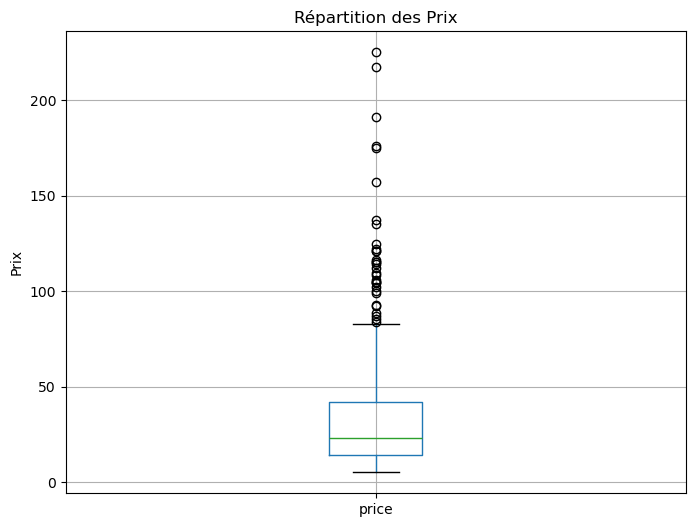

In [100]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
plt.figure(figsize=(8, 6))
df_merge.boxplot(column=['price'])
plt.title('Répartition des Prix')
plt.ylabel('Prix')
plt.xticks([1])
plt.show()

In [101]:
#Autre méthode avec plotly express
fig = px.box(df_merge, y='price', title='Répartition des Prix')
fig.show()


In [102]:
#Autre méthode avec plotly express
px.histogram(df_merge, x='price', title='Répartition des Prix')



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [103]:
#Calculer la moyenne du prix
mean_price = df_merge['price'].mean()
print(f"La moyenne du prix est : {mean_price}")
#Calculer l'écart-type du prix
std_price = df_merge['price'].std()
print(f"L'écart-type du prix est : {std_price}")
#Calculer le Z-score
df_merge['z_score'] = df_merge['price']-mean_price / std_price
print(df_merge[['price', 'z_score']].head(5))

La moyenne du prix est : 32.061784741144415
L'écart-type du prix est : 27.313389431560726
   price    z_score
0   36.0  34.826151
1   67.5  66.326151
2   44.0  42.826151
3   43.0  41.826151
4   59.0  57.826151


In [132]:
mean_z = df_merge['z_score'].mean()
print('moyenne Z score',mean_z)
std_z = df_merge['z_score'].std()
print('écart-type Z score',std_z)
Z = mean_z + 2 * std_z
print('Seuil pour Z score', Z)

moyenne Z score 30.887936112013936
écart-type Z score 27.313389431560736
Seuil pour Z score 85.5147149751354


In [105]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_merge[df_merge['z_score']>=3]['price'].min()

5.2

In [106]:
df_merge[df_merge['z_score']>=3]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type,_merge,z_score
0,5913,1.0,36.0,7.0,instock,17.16,10014,10014,10.0,taxable,Gin,Darnley's London Dry Gin Original,product,NaN,both,34.826151
1,4617,1.0,67.5,6.0,instock,35.57,10459,10459,4.0,taxable,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,product,NaN,both,66.326151
2,4709,1.0,44.0,7.0,instock,22.05,10775,10775,6.0,taxable,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,product,NaN,both,42.826151
3,4656,1.0,43.0,13.0,instock,22.88,10814,10814,7.0,taxable,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,product,NaN,both,41.826151
4,4619,1.0,59.0,8.0,instock,32.01,11049,11049,4.0,taxable,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,product,NaN,both,57.826151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,5574,1.0,59.6,2.0,instock,30.18,8463,8463,2.0,taxable,Vin,Domaine Huet Vouvray Le Mont Moelleux Première...,product,NaN,both,58.426151
730,4357,1.0,39.0,115.0,instock,22.30,9562,9562,5.0,taxable,Champagne,Champagne Larmandier-Bernier Latitude,product,NaN,both,37.826151
731,4396,1.0,62.0,0.0,outofstock,28.42,9636,9636,0.0,taxable,Whisky,Wemyss Malts Blended Malt Scotch Whisky The Hi...,product,NaN,both,60.826151
732,4932,1.0,25.7,5.0,instock,12.75,9937,9937,2.0,taxable,Vin,Marcel Richaud Cairanne Rouge Les Estrambords ...,product,NaN,both,24.526151


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [107]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge.describe()

,onsale_web,price,stock_quantity,purchase_price,total_sales,z_score
count,734.000000,734.000000,734.0000,734.000000,715.000000,734.000000
mean,0.971390,32.061785,22.8297,16.763038,7.965035,30.887936
std,0.166822,27.313389,22.2269,14.668752,4.799061,27.313389
min,0.000000,5.200000,0.0000,2.740000,-56.000000,4.026151
25%,1.000000,14.062500,8.0000,7.247500,5.000000,12.888651
50%,1.000000,23.300000,19.0000,12.180000,8.000000,22.126151
75%,1.000000,41.800000,30.0000,22.010000,11.000000,40.626151
max,1.000000,225.000000,145.0000,137.810000,36.000000,223.826151


In [108]:
#Quel est le seuil prix dont z-score est inferieur à 3?
df_merge[df_merge['z_score']<3]['price'].min()

nan

In [109]:
out_price = (df_merge[(df_merge['z_score'] > 3) | (df_merge['z_score'] < -3)])
out_price.describe()

,onsale_web,price,stock_quantity,purchase_price,total_sales,z_score
count,734.000000,734.000000,734.0000,734.000000,714.000000,734.000000
mean,0.971390,32.061785,22.8297,16.763038,8.054622,30.887936
std,0.166822,27.313389,22.2269,14.668752,4.161344,27.313389
min,0.000000,5.200000,0.0000,2.740000,0.000000,4.026151
25%,1.000000,14.062500,8.0000,7.247500,5.000000,12.888651
50%,1.000000,23.300000,19.0000,12.180000,8.000000,22.126151
75%,1.000000,41.800000,30.0000,22.010000,11.000000,40.626151
max,1.000000,225.000000,145.0000,137.810000,36.000000,223.826151


In [112]:
#Définissez un seuil pour les articles "outliers" en prix
"""Avec la moethode IQR par exemple : 
Limite inférieure : 
𝑄1−1.5×𝐼𝑄𝑅Q1−1.5×IQR
Limite supérieure : 
𝑄3+1.5×𝐼𝑄𝑅Q3+1.5×IQR"""

'Avec la moethode IQR par exemple : \nLimite inférieure : \n𝑄1−1.5×𝐼𝑄𝑅Q1−1.5×IQR\nLimite supérieure : \n𝑄3+1.5×𝐼𝑄𝑅Q3+1.5×IQR'

In [113]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# Définir le seuil pour les outliers
outlier_par = 3

# Filtrer les prix dont le Z-score est supérieur au seuil ou inférieur à -seuil
outliers = df_merge[(df_merge['z_score'] > outlier_par) | (df_merge['z_score'] < -outlier_par)]

# Afficher les outliers
print("Articles considérés comme outliers en termes de prix :")
print(outliers)
print(outliers.describe())

Articles considérés comme outliers en termes de prix :
    product_id  onsale_web  price  stock_quantity stock_status  \
0         5913         1.0   36.0             7.0      instock   
1         4617         1.0   67.5             6.0      instock   
2         4709         1.0   44.0             7.0      instock   
3         4656         1.0   43.0            13.0      instock   
4         4619         1.0   59.0             8.0      instock   
..         ...         ...    ...             ...          ...   
729       5574         1.0   59.6             2.0      instock   
730       4357         1.0   39.0           115.0      instock   
731       4396         1.0   62.0             0.0   outofstock   
732       4932         1.0   25.7             5.0      instock   
733       4954         1.0   25.0            23.0      instock   

     purchase_price               id_web                  sku  total_sales  \
0             17.16                10014                10014         10.0

In [133]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# Définir le seuil pour les outliers
outlier_par = Z

# Filtrer les prix dont le Z-score est supérieur au seuil ou inférieur à -seuil
outliers = df_merge[(df_merge['z_score'] > outlier_par) | (df_merge['z_score'] < -outlier_par)]

# Afficher les outliers
print("Articles considérés comme outliers en termes de prix :")
print(outliers)
print(outliers.describe())

Articles considérés comme outliers en termes de prix :
    product_id  onsale_web  price  stock_quantity stock_status  \
12        6214         1.0   99.0             9.0      instock   
13        5008         1.0  105.0            12.0      instock   
15        4132         1.0   88.4             7.0      instock   
46        6215         1.0  115.0            14.0      instock   
47        5007         1.0  105.0            15.0      instock   
48        4582         1.0  109.6            18.0      instock   
112       5026         1.0   86.8           101.0      instock   
113       5025         1.0  112.0           136.0      instock   
120       6212         1.0  115.0            16.0      instock   
134       4904         1.0  137.0             9.0      instock   
167       5001         1.0  217.5            18.0      instock   
168       6201         1.0  105.6            16.0      instock   
197       5918         1.0  114.0            12.0      instock   
198       5916       

In [114]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
print("Je comprend pas réellement la question, mais d'aprés les graphs ces outliers sont réellement un peu en dehors des autres prix, mais cela ne dit pas forcement qu'on doit les ignorer surtout que nous sommes sur un site qui vend des produits de 'LUXE' ")
print("Et certains de ces articles ont réussi à trouver des acheteurs")

Je comprend pas réellement la question, mais d'aprés les graphs ces outliers sont réellement un peu en dehors des autres prix, mais cela ne dit pas forcement qu'on doit les ignorer surtout que nous sommes sur un site qui vend des produits de 'LUXE' 
Surtout que certains de ces articles ont réussi à trouver des acheteurs


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [115]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['CA']=df_merge['price']*df_merge['total_sales']
#Calculez la somme de la colonne "ca_par_article"
df_merge['CA'].sum()
#Ce résultat correspond au chiffre d'affaire du site web
print("le CA du site web pour le mois d'octobre est de :", round(df_merge['CA'].sum(),2),"€")

le CA du site web pour le mois d'octobre est de : 143680.1 €


In [116]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge_sort = df_merge.sort_values(by='CA', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_merge_sort.reset_index()
#Afficher les 20 premier articles en CA
df_merge_sort_20=df_merge_sort.head(20)
print(df_merge_sort_20)
#Graphique en barre des 20 premiers articles avec plotly express
px.bar(df_merge_sort_20, x='post_title', y='CA', title='Top 20 des articles par chiffre d\'affaires',labels={'post_title': 'Nom du Produit', 'CA': 'Chiffre d\'affaires'})

    product_id  onsale_web  price  stock_quantity stock_status  \
531       4352         1.0  225.0             0.0   outofstock   
233       5892         1.0  191.3            98.0      instock   
36        4353         1.0   79.5           127.0      instock   
313       5826         1.0   41.2            34.0      instock   
120       6212         1.0  115.0            16.0      instock   
112       5026         1.0   86.8           101.0      instock   
13        5008         1.0  105.0            12.0      instock   
277       5767         1.0  175.0            12.0      instock   
221       6126         1.0  135.0           138.0      instock   
113       5025         1.0  112.0           136.0      instock   
168       6201         1.0  105.6            16.0      instock   
717       4406         1.0  157.0            12.0      instock   
674       4647         1.0   28.5            45.0      instock   
107       4358         1.0   77.0            81.0      instock   
106       

In [117]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge_sort['Part_CA']=df_merge_sort['CA']/df_merge_sort['CA'].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge_sort['Partcum_CA']=df_merge_sort['Part_CA'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
articles_80_s = df_merge_sort[df_merge_sort['Partcum_CA'] <= 0.8]['product_id'].count()
print(f"Nombre d'articles représentant 80% du CA : {articles_80_s}")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
propotion_80_s=round(((articles_80_s/df_merge_sort['product_id'].count())*100),2)
print(f"La proportion que représentent ce groupe (CA) d'articles dans le catalogue entier du site web : {propotion_80_s} %")

Nombre d'articles représentant 80% du CA : 434
La proportion que représentent ce groupe (CA) d'articles dans le catalogue entier du site web : 59.13 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [118]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge_sort_vendu = df_merge.sort_values(by='total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_merge_sort_vendu.reset_index()
#Afficher les 20 premier articles en quantité
df_merge_sort_vendu_20=df_merge_sort_vendu.head(20)
print(df_merge_sort_vendu_20)
#Graphique en barre des 20 premiers articles avec plotly express
px.bar(df_merge_sort_vendu_20, x='post_title', y='total_sales', title='Top 20 des articles par Quantités vendues',labels={'post_title': 'Nom du Produit', 'total_sales': 'Quantités vendues'})

    product_id  onsale_web  price  stock_quantity stock_status  \
600       4867         1.0    9.9           121.0      instock   
341       4203         1.0    9.9            74.0      instock   
214       4275         1.0   14.9            62.0      instock   
674       4647         1.0   28.5            45.0      instock   
226       4726         1.0   12.7             0.0   outofstock   
313       5826         1.0   41.2            34.0      instock   
164       6129         1.0    5.2            68.0      instock   
461       4220         1.0   11.6            48.0      instock   
86        5803         1.0   17.1            47.0      instock   
432       6569         1.0   29.0            58.0      instock   
382       5778         1.0    5.8            44.0      instock   
634       4188         1.0    9.5            51.0      instock   
670       4105         1.0    6.8            45.0      instock   
628       4863         1.0    8.2            54.0      instock   
142       

In [119]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge_sort_vendu['part_sales']=df_merge_sort_vendu['total_sales']/df_merge_sort_vendu['total_sales'].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge_sort_vendu['partcum_sales']=df_merge_sort_vendu['part_sales'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
articles_v_80_s = df_merge_sort_vendu[df_merge_sort_vendu['partcum_sales'] <= 0.8]['product_id'].count()
print(f"Nombre d'articles représentant 80% de la qtt totale : {articles_v_80_s}")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
propotion_v_80_s=round(((articles_v_80_s/df_merge_sort_vendu['product_id'].count())*100),2)
print(f"La proportion que représentent ce groupe (Total de ventes) d'articles dans le catalogue entier du site web : {propotion_v_80_s} %")

Nombre d'articles représentant 80% du CA : 426
La proportion que représentent ce groupe (Total de ventes) d'articles dans le catalogue entier du site web : 58.04 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [120]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 

In [121]:
# Calcul du nombre de mois de stock
df_merge['Months_of_stock'] = df_merge['stock_quantity'] / df_merge['total_sales']
# Remplacement des valeurs infinies par 0 (dans le cas où total_sales est 0)
df_merge['Months_of_stock'].replace([np.inf, -np.inf], 0, inplace=True)
# Tri dans l'ordre décroissant du nombre de mois de stock
df_merge_sort_stock = df_merge.sort_values(by='Months_of_stock', ascending=False)
# Sélection des 20 produits avec le plus de mois de stock
df_merge_sort_stock_20 = df_merge_sort_stock.head(20)
# Création d'un graphique en barres
px.bar(df_merge_sort_stock_20, x='post_title', y='Months_of_stock',
             title='Top 20 des produits avec le plus de mois de stock',
             labels={'post_title': 'Produit', 'Months_of_stock': 'Nombre de mois de stock'})


C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_21176\360180663.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [134]:
df_merge_sort_stock_20

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,product_type,post_title,post_type,post_mime_type,_merge,z_score,CA,Months_of_stock
14,4142,1.0,53.0,125.0,instock,32.15,11641,11641,4.0,taxable,Champagne,Champagne Gosset Grand Millésime 2006,product,NaN,both,51.826151,212.0,31.250000
221,6126,1.0,135.0,138.0,instock,80.33,14923,14923,5.0,taxable,Champagne,Champagne Gosset Célébris Vintage 2007,product,NaN,both,133.826151,675.0,27.600000
34,4356,1.0,51.6,81.0,instock,31.00,12585,12585,3.0,taxable,Champagne,Champagne Egly-Ouriet Premier Cru Les Vignes d...,product,NaN,both,50.426151,154.8,27.000000
35,4348,1.0,59.0,125.0,instock,34.76,12586,12586,5.0,taxable,Champagne,Champagne Egly-Ouriet Grand Cru Brut Tradition,product,NaN,both,57.826151,295.0,25.000000
92,4148,1.0,37.5,71.0,instock,21.88,1364,1364,3.0,taxable,Champagne,Champagne Mailly Grand Cru Brut Rosé,product,NaN,both,36.326151,112.5,23.666667
730,4357,1.0,39.0,115.0,instock,22.30,9562,9562,5.0,taxable,Champagne,Champagne Larmandier-Bernier Latitude,product,NaN,both,37.826151,195.0,23.000000
689,4144,1.0,49.0,91.0,instock,27.73,1662,1662,4.0,taxable,Champagne,Champagne Gosset Grand Rosé,product,NaN,both,47.826151,196.0,22.750000
113,5025,1.0,112.0,136.0,instock,68.60,13914,13914,6.0,taxable,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,product,NaN,both,110.826151,672.0,22.666667
37,4350,1.0,79.5,145.0,instock,47.30,12588,12588,7.0,taxable,Champagne,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,product,NaN,both,78.326151,556.5,20.714286
95,4150,1.0,59.0,123.0,instock,35.45,1366,1366,6.0,taxable,Champagne,Champagne Mailly Grand Cru Intemporelle 2010,product,NaN,both,57.826151,354.0,20.500000


In [122]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge['Valorisation'] = df_merge['stock_quantity'] * df_merge['price']
#Calculer la somme de la colonne "Valorisation_stock_euros"
sum_valorisation = round(df_merge['Valorisation'].sum(),2)
print(f"Somme totale de la valorisation des stocks : {sum_valorisation} euros")

valo_ca= round(sum_valorisation/df_merge['CA'].sum(),2)
print('Ceci represente',valo_ca,'du CA du mois')

Somme totale de la valorisation des stocks : 495092.6 euros
Ceci represente 3.45 du CA du mois


In [123]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
total_stock = df_merge['stock_quantity'].sum()
print(f"Somme totale de la colonne stock quantity : {total_stock}")

Somme totale de la colonne stock quantity : 16757.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [124]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge['prix_HT']=(df_merge['price'] / 1.2)
#Création de la colonne Taux de marge
df_merge['Taux_de_marge'] = (df_merge['prix_HT'] - df_merge['purchase_price']) / df_merge['purchase_price']
#Afficher le prix minimum de la colonne "taux_marge"
t_min_marge = df_merge[df_merge['Taux_de_marge']==df_merge['Taux_de_marge'].min()]['price'].iloc[0]
print(f'le prix minimum de la colonne "taux_marge"',t_min_marge)
print(df_merge['Taux_de_marge'].min())
#Afficher le prix maximum de la colonne "taux_marge"
t_max_marge = df_merge[df_merge['Taux_de_marge']==df_merge['Taux_de_marge'].max()]['price'].iloc[0]
print('le prix maximum de la colonne "taux_marge"', t_max_marge)
print(df_merge['Taux_de_marge'].max())

le prix minimum de la colonne "taux_marge" 12.65
-0.8639433832386852
le prix maximum de la colonne "taux_marge" 62.5
0.9141247090530442


In [125]:
#affichage de la ligne avec un taux de marge inférieur à 0
marge_neg = df_merge[df_merge['Taux_de_marge'] < 0 ]
marge_neg

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,tax_status,...,post_title,post_type,post_mime_type,_merge,z_score,CA,Months_of_stock,Valorisation,prix_HT,Taux_de_marge
38,4355,1.0,12.65,97.0,instock,77.48,12589,12589,0.0,taxable,...,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,product,NaN,both,11.476151,0.0,0.0,1227.05,10.541667,-0.863943
267,4864,0.0,8.30,0.0,outofstock,9.99,15154,NaN,NaN,NaN,...,NaN,NaN,NaN,left_only,7.126151,NaN,NaN,0.00,6.916667,-0.307641


In [126]:
#création d'un dataframe avec les taux positifs
df_merge_p = df_merge.drop(df_merge[df_merge['Taux_de_marge'] < 0 ].index)
#Afficher le prix minimum de la colonne "taux_marge"
t_min_marge = df_merge_p[df_merge_p['Taux_de_marge']==df_merge_p['Taux_de_marge'].min()]['price'].iloc[0]
print(f'le prix minimum de la colonne "taux_marge"',t_min_marge)
print(f'le taux de marge minimum',df_merge_p['Taux_de_marge'].min())
#Afficher le prix maximum de la colonne "taux_marge"
t_max_marge = df_merge_p[df_merge_p['Taux_de_marge']==df_merge_p['Taux_de_marge'].max()]['price'].iloc[0]
print(f'le prix maximum de la colonne "taux_marge"', t_max_marge)
print(f'le taux de marge max',df_merge_p['Taux_de_marge'].max())

le prix minimum de la colonne "taux_marge" 13.1
le taux de marge minimum 0.2949782522736259
le prix maximum de la colonne "taux_marge" 62.5
le taux de marge max 0.9141247090530442


In [127]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_merge_p_produit_marge = df_merge_p.groupby('product_type')['Taux_de_marge'].mean().reset_index()
df_merge_p_produit_marge = df_merge_p_produit_marge.sort_values(by='Taux_de_marge', ascending=False)
print(df_merge_p_produit_marge)
#Affichage dans un graphique du taux de marge par type de produit
px.bar(df_merge_p_produit_marge, x='product_type', y='Taux_de_marge',
             title='Taux de marge moyen par type de produit',
             labels={'product_type': 'Type de produit', 'Taux_de_marge': 'Taux de marge moyen'})


    product_type  Taux_de_marge
1         Cognac       0.823162
5         Whisky       0.817392
2            Gin       0.748252
4            Vin       0.614961
0      Champagne       0.399546
3  Huile d'olive       0.333901


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

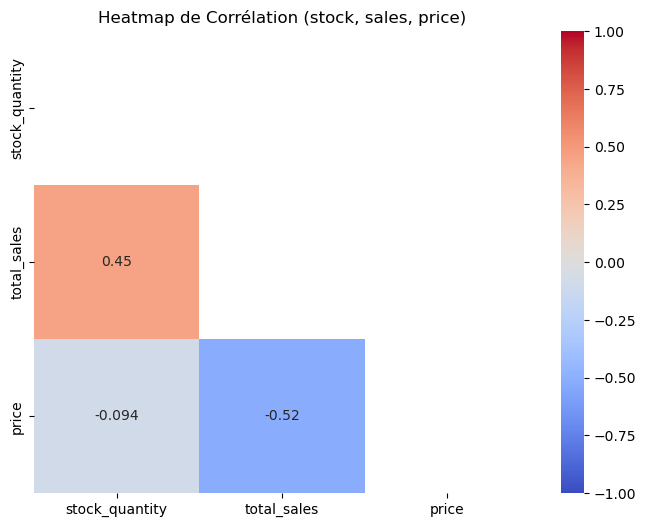

In [128]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price
df_corr = df_merge_p[['stock_quantity', 'total_sales', 'price']]
#on peut également créer un mask pour n'afficher qu'une demi heatmap
corr_matrix = df_corr.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Heatmap de Corrélation (stock, sales, price)')
plt.show()

In [129]:
print(corr_matrix)

                stock_quantity  total_sales     price
stock_quantity        1.000000     0.452609 -0.093596
total_sales           0.452609     1.000000 -0.519752
price                -0.093596    -0.519752  1.000000


In [130]:
#Que peut-on conclure des correlations ?
"""
Corrélation entre stock_quantity et total_sales (0.452609) :
Il y a une corrélation positive modérée entre les et la quantité de stock ventes. Cela suggère que, généralement, plus il y a de ventes, plus le stock est élevé.

Corrélation entre stock_quantity et price (-0.093596) :
Il y a une très faible corrélation négative entre la quantité de stock et le prix. Cette relation est presque négligeable.

Corrélation entre total_sales et price (-0.519752) :
Il y a une corrélation négative modérée entre les ventes totales et le prix. Cela signifie que, généralement, à mesure que le prix augmente, les ventes totales diminuent.
"""

'\nCorrélation entre stock_quantity et total_sales (0.452609) :\nIl y a une corrélation positive modérée entre les et la quantité de stock ventes. Cela suggère que, généralement, plus il y a de ventes, plus le stock est élevé.\n\nCorrélation entre stock_quantity et price (-0.093596) :\nIl y a une très faible corrélation négative entre la quantité de stock et le prix. Cette relation est presque négligeable.\n\nCorrélation entre total_sales et price (-0.519752) :\nIl y a une corrélation négative modérée entre les ventes totales et le prix. Cela signifie que, généralement, à mesure que le prix augmente, les ventes totales diminuent.\n'

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [131]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  

chemin_vers_fichier_excel = './df_merge.xlsx'

# Exportez le DataFrame vers Excel
df_merge.to_excel(chemin_vers_fichier_excel, index=False)

print(f"Le DataFrame df_merge a été exporté avec succès vers : '{chemin_vers_fichier_excel}'")

Le DataFrame df_merge a été exporté avec succès vers : './df_merge.xlsx'
